# Image Offsets: Display offset arrays

This script offloads the burden of displaying offsets arrays from script Offsets_3.

We mostly repeat here the relevant parts in Offsets_3.

In [1]:
import os, glob

import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

import scipy.ndimage.filters
from scipy.ndimage import convolve as convolve_scipy
from astropy.table import Table
from astropy.io import fits

import rawpy

from datapath import DATA

In [2]:
datadir = os.path.join(DATA,'astrophotography_data/Andromeda_2022/104MSDCF/')

## Plot function

In [3]:
def plot_diagnostics(offsets_x, offsets_y, laplacian=True, lrange=0.5):
    # Laplacian kernel
    A = np.zeros((3,3))
    A[1,1] = 1
    kernel = scipy.ndimage.filters.laplace(A)

    laplacian_x = convolve_scipy(offsets_x, kernel, mode='mirror')
    laplacian_y = convolve_scipy(offsets_y, kernel, mode='mirror')
    
    # plot everything
    cmap = 'bwr'

    fig = plt.figure(figsize=(9.5,7))

    a = fig.add_subplot(2, 2, 1)
    plt.imshow(offsets_x)
    plt.colorbar()
    a.set_title('X offsets')

    a1 = fig.add_subplot(2, 2, 2, sharex=a, sharey=a)
    plt.imshow(offsets_y)
    plt.colorbar()
    _ = a1.set_title('Y offsets')
    
    if laplacian:

        a2 = fig.add_subplot(2, 2, 3, sharex=a, sharey=a)
        plt.imshow(laplacian_x, cmap=cmap, vmin=-lrange, vmax=lrange)
        plt.colorbar()
        _ = a2.set_title('X Laplacian')

        a3 = fig.add_subplot(2, 2, 4, sharex=a, sharey=a)
        plt.imshow(laplacian_y, cmap=cmap, vmin=-lrange, vmax=lrange)
        plt.colorbar()
        _ = a3.set_title('Y Laplacian')

## Ploting loop

In [4]:
name_list = glob.glob(datadir + '*.offsets.fits')
name_list.sort()

/var/folders/y5/zcwj7zc17g19nggvb1vx4rc80000gn/T/ipykernel_75441/2126087584.py:5: DeprecationWarning: Please use `laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  kernel = scipy.ndimage.filters.laplace(A)


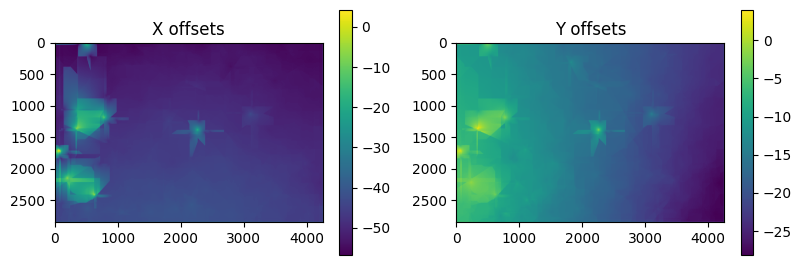

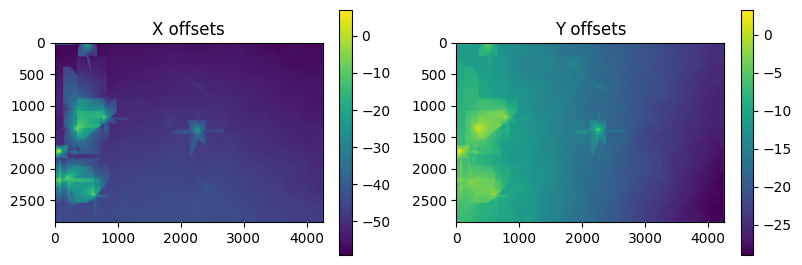

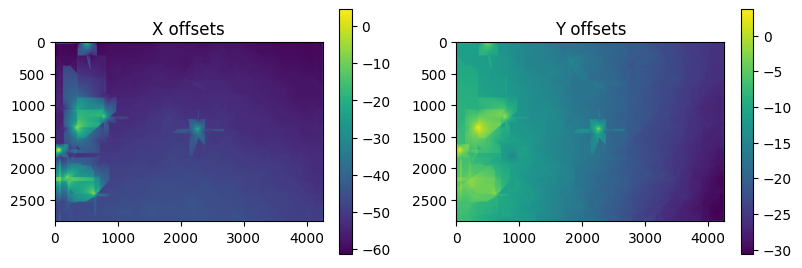

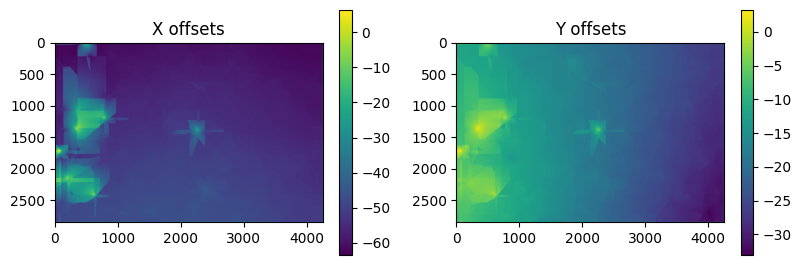

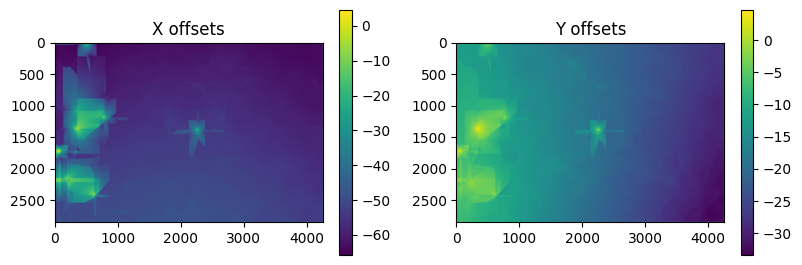

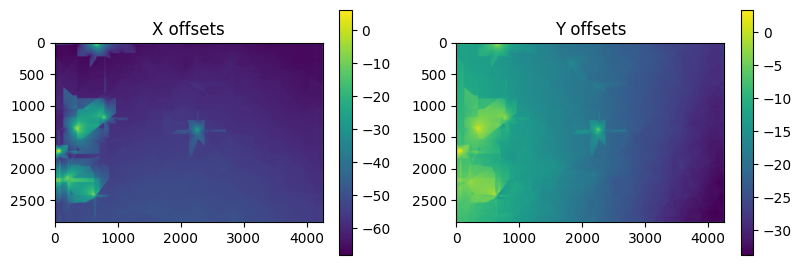

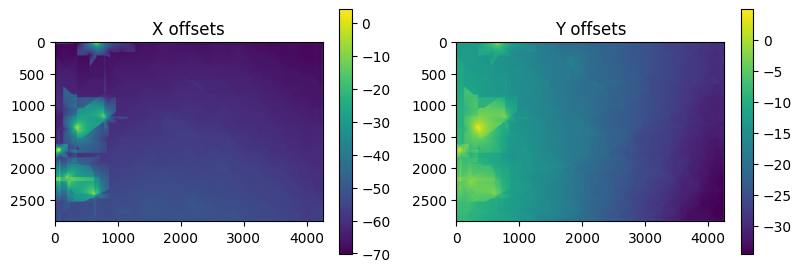

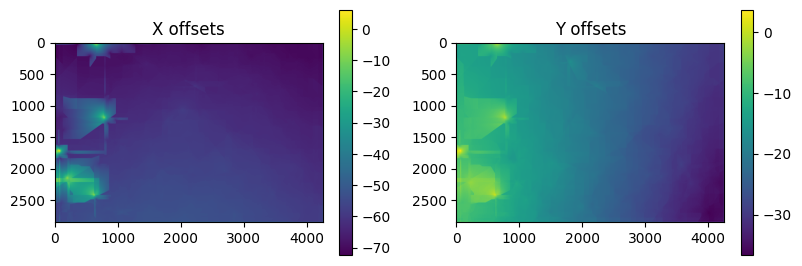

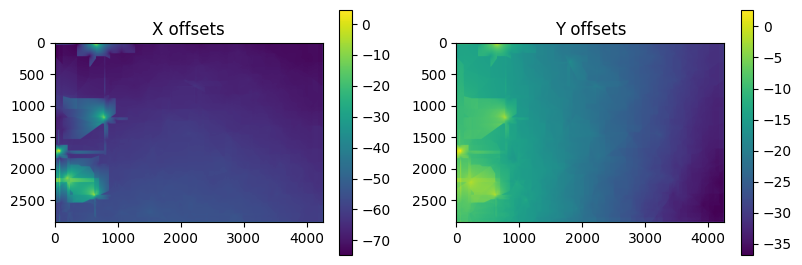

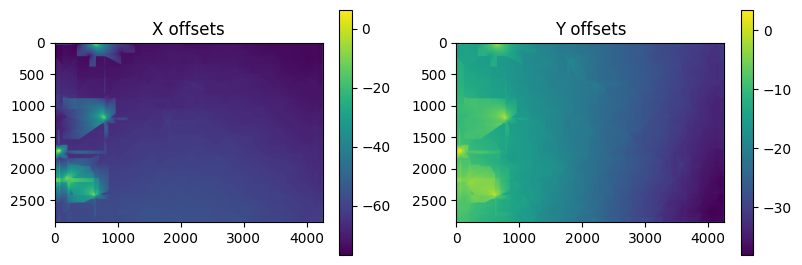

In [7]:
for offsets_name in name_list[25:35]:
    f = fits.open(offsets_name)
    x = f[1].data
    y = f[2].data
    f.close()
    plot_diagnostics(x, y, laplacian=False)

In [6]:
plt.close()